In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score


In [111]:
#knn self preactice--------------------

In [112]:
df = pd.read_excel('C:\\Users\\Kasutaja\\Downloads\\frauddatasetnew.xlsx')

In [113]:
df.head()

,dist_from_home,purchase_price_ratio,fraud
0,2.1,6.4,1
1,3.8,2.2,1
2,15.7,4.4,0
3,26.7,4.6,1
4,10.7,4.9,1


<Axes: xlabel='dist_from_home', ylabel='purchase_price_ratio'>

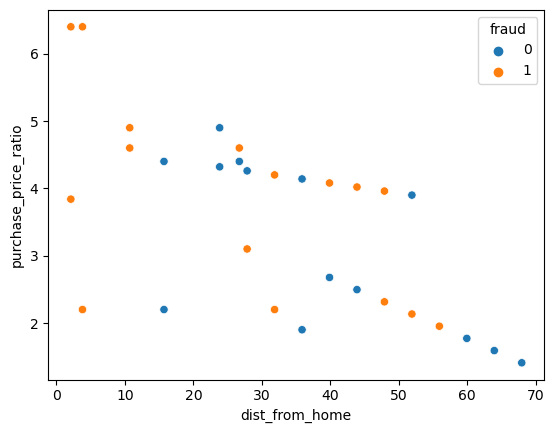

In [114]:
#First we visualize the data on scatterplot
sns.scatterplot(x = df['dist_from_home'], y = df['purchase_price_ratio'], hue = df['fraud'])

In [115]:
#data prepation
# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']


In [116]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [117]:
# Scale the features using StandardScaler
#normalize the features, to avoid data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
#Explain------
#This code is used to prepare data for a machine learning model.
#• First, the data is split into features (X) and target (y) using the drop method to remove the 'fraud' column from the original dataframe df.
#• The axis=1 parameter specifies that the column should be dropped along the columns axis (i.e., horizontally).
#• The resulting X variable contains all the columns except for 'fraud', while y contains only the 'fraud' column.
#• Next, the data is split into training and test sets using the train_test_split function from the sklearn.model_selection module.
#• The test_size parameter specifies the proportion of the data that should be allocated to the test set (in this case, 20%).
#• Finally, the features in the training and test sets are scaled using the StandardScaler class from the sklearn.preprocessing module.
#• This is done to ensure that all features are on the same scale, which can improve the performance of some machine learning algorithms.
#• The fit_transform method is used to fit the scaler to the training data and transform it, while the transform method is used to transform the test data using the same scaling parameters.

In [119]:
#create the model
#We pass both the features and the target
#variable, so the model can learn.
model = KNeighborsClassifier(n_neighbors=3)


In [120]:
#fit the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [121]:
#Explain--------
#This code is written in Python and uses the scikit-learn library.
# The first line creates an instance of the KNeighborsClassifier class with the parameter n_neighbors set to 3.
# This means that the classifier will consider the 3 nearest neighbors when making predictions.
# The second line fits the classifier to the training data X_train and y_train.
# This means that the classifier will learn from the training data and be able to make predictions on new data.
# Overall, this code is creating and training a K-Nearest Neighbors classifier with a k value of 3.

In [122]:
#prediction
#We can make predictions on the 
#test dataset, which we can use later to score the model.
y_pred = model.predict(X_test)



In [123]:
#Explain------
#This code uses the scikit-learn library in Python to make predictions on a test dataset using a k-nearest neighbors (KNN) classifier.
# The knn object is assumed to have been previously defined and trained on a training dataset.
# The predict method of the knn object is then called with the X_test dataset as input.
# This returns an array of predicted class labels for each sample in X_test, which is assigned to the variable y_pred.
# Overall, this code is used to evaluate the performance of the KNN classifier on a test dataset by comparing the predicted labels to the true labels.

In [124]:
#Evaluate prediction using acurancy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6666666666666666


In [125]:

#Explain------
#This code calculates the accuracy of a machine learning model by comparing the predicted values (stored in y_pred) with the actual values (stored in y_test).
# The accuracy_score function from the scikit-learn library is used to perform this calculation.
#The resulting accuracy value is then printed to the console using the print function.
#Was this helpful? 

In [126]:

#Explain------
#This code snippet is not actually code, but rather a markdown text that displays the accuracy of a model.
#The value of 0.875 represents the accuracy score, which is a metric used to evaluate the performance of a machine learning model.
# An accuracy score of 0.875 means that the model correctly predicted the outcome 87.5% of the time."""

In [127]:
#Explain------
#This is a pretty good score! However, we may be able
#to do better by optimizing our value of k.

#Using Cross Validation to Get the Best Value of k
#Unfortunately, there is no magic way to find the best 
#value for k. We have to loop 
#through many different values, then use our best judgment.

In [128]:
#Use cross validation to find best k value

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))



C:\Users\Kasutaja\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kasutaja\anaconda4\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kasutaja\anaconda4\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kasutaja\anaconda4\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Kasutaja\anaconda4\Lib\site-packages\sklearn\neighbors\_classification.py", line 249, in p

In [129]:

#Explain------
#This code creates a list of k values from 1 to 30 and an empty list to store the scores.
# It then creates a StandardScaler object and uses it to standardize the input data X.
#Next, it loops through each value of k in the k_values list and creates a KNeighborsClassifier object with n_neighbors set to the current value of k.
#It then uses cross_val_score to calculate the accuracy of the classifier using 5-fold cross-validation on the standardized data X and the target variable y.
#The mean accuracy score is then appended to the scores list.
# Overall, this code is performing a grid search over different values of k for the k-nearest neighbors classifier 
#and using cross-validation to evaluate the performance of each model.
#The final output is a list of mean accuracy scores for each value of k."""

Text(0, 0.5, 'Accuracy Score')

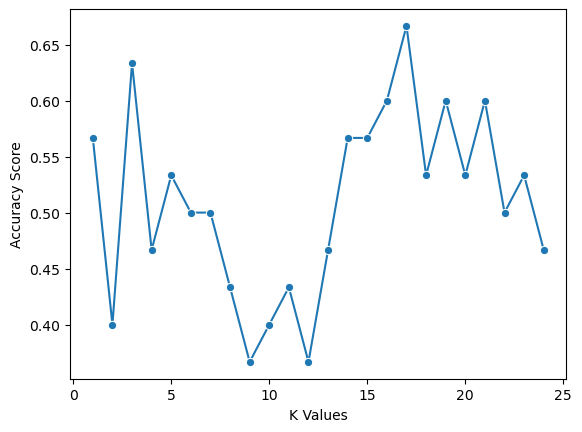

In [130]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [131]:
#Explain------

#This code uses the Seaborn library to create a line plot.
#• The sns.lineplot() function takes two arguments: x and y, which are the values to be plotted on the x and y axes respectively.
#• In this case, k_values is the list of values to be plotted on the x-axis and scores is the list of values to be plotted on the y-axis.
#• The marker parameter specifies the marker style for the data points on the line plot.
#• The plt.xlabel() and plt.ylabel() functions are used to set the labels for the x and y axes respectively.
#• In this case, the x-axis label is set to "K Values" and the y-axis label is set to "Accuracy Score".

In [132]:
#We can see from our chart that k = 9, 10, 11, 12, and 
#13 all have an accuracy score of just under 95%. As 
#these are tied for the best score, it is advisable to
#use a smaller value for k. This is because when using 
#higher values of k, the model will use more data points 
#that are further away from the original. Another option 
#would be to explore other evaluation metrics.

In [133]:
#------------------More Evaluation Metrics-------------------

In [140]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [141]:
#Explain------

#This code snippet is written in Python and uses the NumPy and scikit-learn libraries.
#• First, the np.argmax() function is used to find the index of the highest value in the scores array.
#• This index corresponds to the best value of k (number of neighbors) for the K-Nearest Neighbors algorithm.
#• The value of k is then retrieved from the k_values array using this index and stored in the best_k variable.
#• Next, a KNeighborsClassifier object is created with the n_neighbors parameter set to the best_k value.
#• This object is then trained on the training data (X_train and y_train) using the fit() method.
#• Overall, this code is selecting the best value of k for the K-Nearest Neighbors algorithm based on the highest score, and then using this value to train a KNN model on the training data.

In [150]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 24, n_neighbors = 25

In [148]:
#Explain------

#This code snippet is evaluating the performance of a k-nearest neighbors (KNN) classifier on a test set.
#• First, the predict method of the KNN classifier (knn) is used to generate predicted labels (y_pred) for the test set (X_test).
#• Next, three performance metrics are calculated using the true labels (y_test) and the predicted labels (y_pred).
#• The accuracy_score function from the sklearn.metrics module is used to calculate the accuracy of the classifier, which is the proportion of correctly classified instances.
#• The precision_score function is used to calculate the precision of the classifier, which is the proportion of true positives (correctly classified positive instances) out of all instances classified as positive.
#• The recall_score function is used to calculate the recall of the classifier, which is the proportion of true positives out of all actual positive instances.
#• Finally, the accuracy, precision, and recall scores are printed to the console.

In [147]:
#Explain------

#This code snippet is not actually code, but rather a display of evaluation metrics for a classification model.
#• Accuracy refers to the proportion of correctly classified instances out of all instances.
#• In this case, the model has an accuracy of 0.875, meaning it correctly classified 87.5% of instances.
#• Precision refers to the proportion of true positives (correctly classified positive instances) out of all positive predictions.
#• In this case, the model has a precision of 0.75, meaning 75% of positive predictions were actually true positives.
#• Recall refers to the proportion of true positives out of all actual positive instances.
#• In this case, the model has a recall of 1.0, meaning it correctly identified all positive instances.
#• These metrics are commonly used to evaluate the performance of classification models.